In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# Read in cleaned US dataframe
US = pd.read_csv('../data/us_rep_elections.csv')

In [3]:
US

,name,raised,spent,state,district,party,incumbent,winner
0,Jerry Carl,1971321,1859349,AL,1,R,False,True
1,James Averhart,80095,78973,AL,1,D,False,False
2,Barry Moore,650807,669368,AL,2,R,False,True
3,Phyllis Harvey-Hall,56050,55988,AL,2,D,False,False
4,Mike D Rogers,1193111,1218564,AL,3,D,True,True
...,...,...,...,...,...,...,...,...
889,Tricia Zunker,1261957,1232690,WI,7,D,False,False
890,Mike Gallagher,3202905,2841801,WI,8,R,True,True
891,Amanda Stuck,416978,399916,WI,8,D,False,False
892,Liz Cheney,3003883,3060167,WY,1,R,True,True


In [4]:
# Group dataset by Incumbent status and if if they won the race or not
incumbent_winners = US.groupby(['incumbent', 'winner']).size().unstack().iloc[::-1, ::-1]
incumbent_winners.iloc[0] = incumbent_winners.iloc[0]/incumbent_winners.iloc[0].sum()
incumbent_winners.iloc[1] = incumbent_winners.iloc[1]/incumbent_winners.iloc[1].sum()
print(incumbent_winners)

winner       True     False
incumbent                  
True       0.96114  0.03886
False      0.11811  0.88189


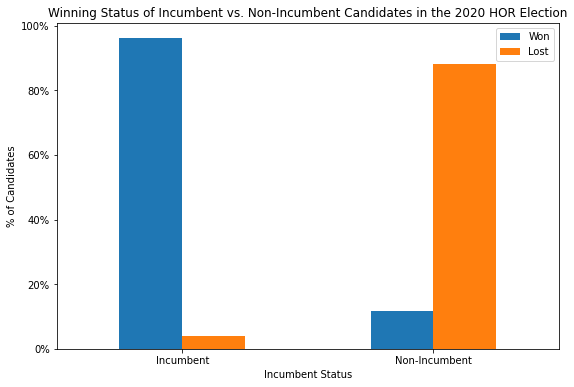

In [5]:
# Investigate how often the incumbent candidate wins a race
fig, ax = plt.subplots(figsize=(9,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
incumbent_winners.plot(kind='bar',
                       rot=0,
                       ax=ax)
plt.title('Winning Status of Incumbent vs. Non-Incumbent Candidates in the 2020 HOR Election')
plt.xlabel('Incumbent Status')
plt.ylabel('% of Candidates')
plt.xticks([0,1], ['Incumbent', 'Non-Incumbent'])
plt.legend(['Won', 'Lost'], loc=1);

Based on the 2020 House of Representative election data, incumbent candidates are highly likely to be re-elected.
96% of incumbent candidates from the 2020 House of Representatives elections were re-elected.<br>
On the other hand, it is very unlikely for a non-incumbent candidate to win their race. Only 12% of non-incumbent candidates from the 2020 House of Representatives elections won their race.